In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 


# 1)

In [7]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [9]:
df.drop(df[df['yr_renovated'] == 0].index, inplace = True)
df.drop(df[df['yr_built'] == 0].index, inplace = True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
103,2450000295,20141007T000000,1088000.0,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113
115,3626039325,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,7351200295,20150114T000000,1150000.0,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588
20057,126039256,20140904T000000,434900.0,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710
20444,4305600360,20150225T000000,500012.0,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539
20447,3319500628,20150212T000000,356999.0,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517


# 2)

<AxesSubplot:title={'center':'hisogram of sqft_living'}, xlabel='sqft_living', ylabel='Frequency'>

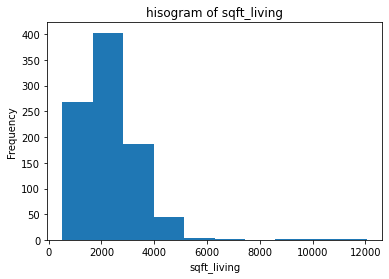

In [25]:
plt.title('hisogram of sqft_living')
plt.xlabel('sqft_living')
df['sqft_living'].plot.hist()

<AxesSubplot:title={'center':'hisogram of bedrooms'}, xlabel='bedrooms', ylabel='Frequency'>

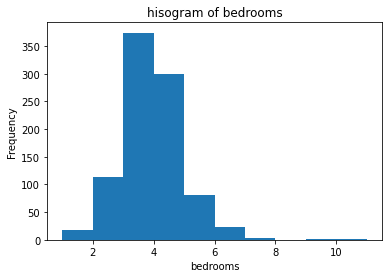

In [26]:
plt.title('hisogram of bedrooms')
plt.xlabel('bedrooms')
df['bedrooms'].plot.hist()

<AxesSubplot:title={'center':'hisogram of bathrooms'}, xlabel='bathrooms', ylabel='Frequency'>

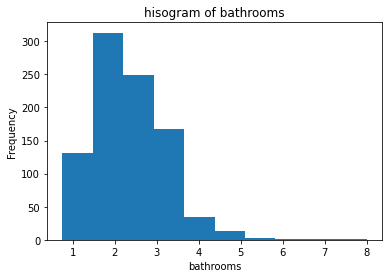

In [27]:
plt.title('hisogram of bathrooms')
plt.xlabel('bathrooms')
df['bathrooms'].plot.hist()

<AxesSubplot:title={'center':'hisogram of floors'}, xlabel='floors', ylabel='Frequency'>

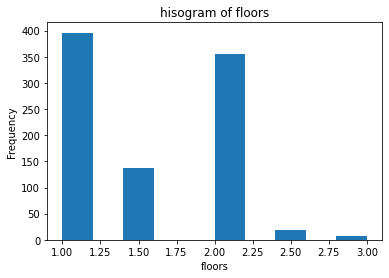

In [28]:
plt.title('hisogram of floors')
plt.xlabel('floors')
df['floors'].plot.hist()

In [32]:
print('mean : ',df["price"].mean())
print('max : ',df["price"].max())
print('min : ',df["price"].min())
print('median : ',df["price"].median())

mean :  760379.0295404814
max :  7700000.0
min :  110000.0
median :  600000.0


i will use for this Checkpoint : 
- Price
- bedrooms
- bathrooms
- sqft living
- floors

=> because it's for me the most important features for a house 

# 3)

In [11]:
x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [13]:
print(len(x_train),'/',len(y_train))
print(len(x_test),'/',len(y_test))

594 / 594
320 / 320


# 4)

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)


# 5)

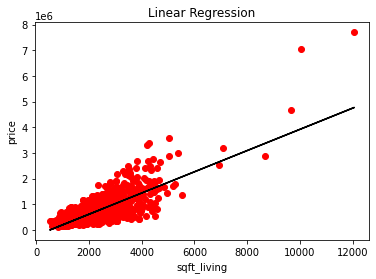

In [15]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

# 6)

In [16]:
print(model.intercept_)
print(model.coef_)

-218571.38529267244
[414.01079233]


In [17]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 154099066197.6246
R squared 0.6495973300815185


# 7)

In [18]:
x=df[["sqft_living","sqft_lot"]]  
y=df["price"].values
mx_train,mx_test,my_train,my_test=train_test_split(x,y,test_size=0.35,random_state=40) 

In [19]:
model=LinearRegression()
model.fit(mx_train,my_train)
mpredicted=model.predict(mx_test)


In [20]:

print("MSE", mean_squared_error(my_test,mpredicted))
print("R squared", metrics.r2_score(my_test,mpredicted))

MSE 151893544048.61655
R squared 0.6546124211436906


In [21]:
print('MSE :')
print('linear ',mean_squared_error(y_test,predicted))
print('multi-linear :',mean_squared_error(my_test,mpredicted))
print('R squared :')
print('linear ',metrics.r2_score(y_test,predicted))
print('multi-linear :',metrics.r2_score(my_test,mpredicted))

MSE :
linear  154099066197.6246
multi-linear : 151893544048.61655
R squared :
linear  0.6495973300815185
multi-linear : 0.6546124211436906


In [22]:

# create matrix and vectors
x = df[["sqft_living","sqft_lot"]]  
y = df["price"].values

lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

In [23]:
x_=poly.fit_transform(x)

In [24]:
print(x)
print(x_)

       sqft_living  sqft_lot
1             2570      7242
35            2300      3060
95            3300     10250
103           2920      8113
115           4380      6350
...            ...       ...
19622         1760      6788
20057         1520      5040
20444         2400      9612
20447         1010      1546
20962          828      4524

[914 rows x 2 columns]
[[1.0000000e+00 2.5700000e+03 7.2420000e+03 6.6049000e+06 1.8611940e+07
  5.2446564e+07]
 [1.0000000e+00 2.3000000e+03 3.0600000e+03 5.2900000e+06 7.0380000e+06
  9.3636000e+06]
 [1.0000000e+00 3.3000000e+03 1.0250000e+04 1.0890000e+07 3.3825000e+07
  1.0506250e+08]
 ...
 [1.0000000e+00 2.4000000e+03 9.6120000e+03 5.7600000e+06 2.3068800e+07
  9.2390544e+07]
 [1.0000000e+00 1.0100000e+03 1.5460000e+03 1.0201000e+06 1.5614600e+06
  2.3901160e+06]
 [1.0000000e+00 8.2800000e+02 4.5240000e+03 6.8558400e+05 3.7458720e+06
  2.0466576e+07]]
